# ProfilesWithTies

Code for generating profile in which voters submit strict weak orders. 

In [1]:
# import the Profile class

from voting.profiles_with_ties import *

# import the voting methods

from voting.voting_methods import *

import math
import random
import pandas as pd
from itertools import product, combinations

from functools import partial
from multiprocess import Pool, cpu_count
import pickle
import timeit

import copy
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()



Use the `ProfileWithTies` class to create a profile in which voters may submit strict weak orderings over the candidates.  To create a profile, specify a list of rankings, the number of candidates, the list of counts for each ranking, and possibly a candidate map (mapping candidates to their names). 

+-------+-----+---+-----+-------+-----+-----+-----+
|   1   |  2  | 1 |  4  |   1   |  2  |  1  |  1  |
+-------+-----+---+-----+-------+-----+-----+-----+
| a b c |  a  | a | a b | a b c | a b | a c | c b |
|       | b c | b |  c  |       |  c  |  b  |  a  |
|       |     | c |     |       |     |     |     |
+-------+-----+---+-----+-------+-----+-----+-----+



1 voters have the ranking (abc)
2 voters have the ranking a(bc)
1 voters have the ranking abc
4 voters have the ranking (ab)c
1 voters have the ranking (abc)
2 voters have the ranking (ab)c
1 voters have the ranking (ac)b
1 voters have the ranking (cb)a


support(a, b) = 4
support(a, a) = 0
support(b, a) = 1
support(a, c) = 9
support(c, a) = 1
support(b, c) = 7
support(c, b) = 1


margin(a, b) = 3
margin(a, a) = 0
margin(b, a) = -3
margin(a, c) = 8
margin(c, a) = -8
margin(b, c) = 6
margin(c, b) = -6


ratio(a, b) = 4.0
ratio(a, a) = 1
ratio(b, a) = 0.25
ratio(a, c) = 9.0
ratio(c, a) = 0.1111111111111111
ratio(b, c) = 7.0
rat

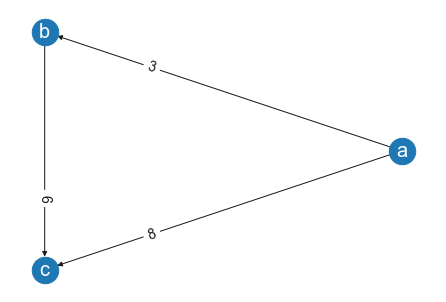

the ration graph


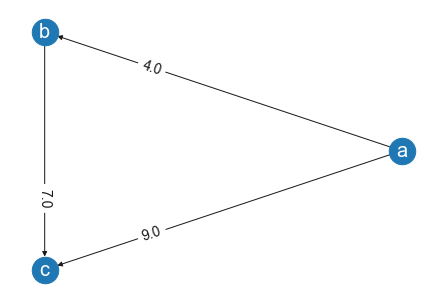

+-----+---+---+---+-----+---+-----+---+
|  1  | 2 | 1 | 4 |  1  | 2 |  1  | 1 |
+-----+---+---+---+-----+---+-----+---+
| a c | a | a | a | a c | a | a c | c |
|     | c |   | c |     | c |     | a |
+-----+---+---+---+-----+---+-----+---+
{'a': 1, 'c': 1}
{'a': 1, 'c': 2}
{'a': 1, 'c': 3}
{'a': 1, 'c': 2}
{'a': 1, 'c': 1}
{'a': 1, 'c': 2}
{'a': 1, 'c': 1}
{'c': 1, 'a': 2}


In [2]:

a = "a"
b = "b"
c = "c"

rankings = [
    {a:1, b:1, c:1},
    {a:1, b:2, c:2},
    {a:1, b:2, c:3},
    {a:1, b:1, c:2},
    {a:1, b:1, c:1},
    {a:1, b:1, c:2},
    {a:1, c:1, b:2},
    {c:1, b:1, a:2}
]
rcounts = [1, 2, 1, 4, 1, 2, 1, 1]
num_cands = 3
prof = ProfileWithTies(rankings, num_cands, rcounts=rcounts)


prof.display()

# 
print("\n\n")
for r,n in zip(prof.rankings, prof.rcounts):
    print(f"{n} voters have the ranking {r}")

# the support of a over b is the number of voters that rank a strictly above b
print("\n")
print(f"support(a, b) = {prof.support(a, b)}")
print(f"support(a, a) = {prof.support(a, a)}")
print(f"support(b, a) = {prof.support(b, a)}")
print(f"support(a, c) = {prof.support(a, c)}")
print(f"support(c, a) = {prof.support(c, a)}")
print(f"support(b, c) = {prof.support(b, c)}")
print(f"support(c, b) = {prof.support(c, b)}")

# the margin of a over b is the number of voters that rank a strictly above b minus
# the number of voters that rank b stirctly above a
print("\n")
print(f"margin(a, b) = {prof.margin(a, b)}")
print(f"margin(a, a) = {prof.margin(a, a)}")
print(f"margin(b, a) = {prof.margin(b, a)}")
print(f"margin(a, c) = {prof.margin(a, c)}")
print(f"margin(c, a) = {prof.margin(c, a)}")
print(f"margin(b, c) = {prof.margin(b, c)}")
print(f"margin(c, b) = {prof.margin(c, b)}")

# the ratio of a over b is the support of a over b divided by the support of b over a
print("\n")
print(f"ratio(a, b) = {prof.ratio(a, b)}")
print(f"ratio(a, a) = {prof.ratio(a, a)}")
print(f"ratio(b, a) = {prof.ratio(b, a)}")
print(f"ratio(a, c) = {prof.ratio(a, c)}")
print(f"ratio(c, a) = {prof.ratio(c, a)}")
print(f"ratio(b, c) = {prof.ratio(b, c)}")
print(f"ratio(c, b) = {prof.ratio(c, b)}")

print("the margin graph")
prof.display_margin_graph()


print("the ration graph")
prof.display_margin_graph(weight='ratio')


prof_minus, _ = prof.remove_candidates([b])

prof_minus.display()

for r in prof_minus.rankings: 
    print(r.rmap)

`generate_truncated_profile(num_cands, num_voters)` generates a profile with truncated preference.   Many (but not all!) of the voting methods will work on truncated profiles. 

In [3]:
prof = generate_truncated_profile(5, 15)

prof.display()


print("Split Cycle winner", split_cycle(prof))
print("Stable Voting winner", stable_voting(prof))
print("Beat Path winner", beat_path(prof))
print("Minimax winner", minimax(prof))
print("Copeland winner", copeland(prof))
print("Llull winner", llull(prof))


+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 3 | 4 | 4 | 1 | 0 | 1 | 1 | 3 | 4 | 0 | 2 | 4 | 2 | 1 |
|   | 1 | 2 |   | 1 | 3 |   | 1 | 0 |   | 4 |   |   | 4 |
|   | 2 | 0 |   |   |   |   | 0 |   |   |   |   |   | 2 |
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
Split Cycle winner [1]
Stable Voting winner [1]
Beat Path winner [1]
Minimax winner [1]
Copeland winner [1]
Llull winner [1]
